# Reinforcement Learning Hyper-parameter Tunning

There several hyper-parameter in our RL experiment needs our attetion:
- The reward setting
- Time period (length)
- Action space (short selling or not)
- Discount factor

In [1]:
import gym
import numpy as np
import pandas as pd
from gym import spaces
import random
import sys
sys.path.append('../module')
from typing import Tuple
import matplotlib.pyplot as plt

from RL_env import EconMarketEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback

from data_handler import get_econ_predictors, \
                         get_quarterly_date_format, \
                        get_monthly_date_format, \
                        get_equities_returns_volatility,\
                        get_equities_returns,\
                        get_env_data

from RL_model import get_policy_in_sample_performance, \
                    evaluate_agent_action
%matplotlib inline

## The reward setting (Gamma)
In our expiriment, we use utility as reward. We penalize the portfolio return using the volatility. We use the gamma, which is the risk-aversion factor, as the penalty level. The gamma impact the agent's policy through the rewards.

In [10]:
START_DATE = '1947'
END_DATE = '2005'
data, equities_returns, equities_returns_vol = get_env_data(START_DATE, END_DATE)
features_dict = {'volatility': equities_returns_vol}
env_data_dict = {'state': data, 
                 'portfolio': equities_returns, 
                 'features': features_dict}
eval_env = EconMarketEnv(env_data_dict, gamma = 0)
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path="../../log/model/",
                             log_path="../../log/trainning/", 
                             eval_freq=500,
                             deterministic=True, 
                             render=False,
                             verbose=0)
env = EconMarketEnv(env_data_dict, gamma = 0)
model = PPO("MlpPolicy", env, tensorboard_log="../../log/tensorboard_reward_utility/", verbose=0)
model.learn(int(2e5), progress_bar=True, callback=eval_callback)

Output()

Total reward: 9.099144611774019


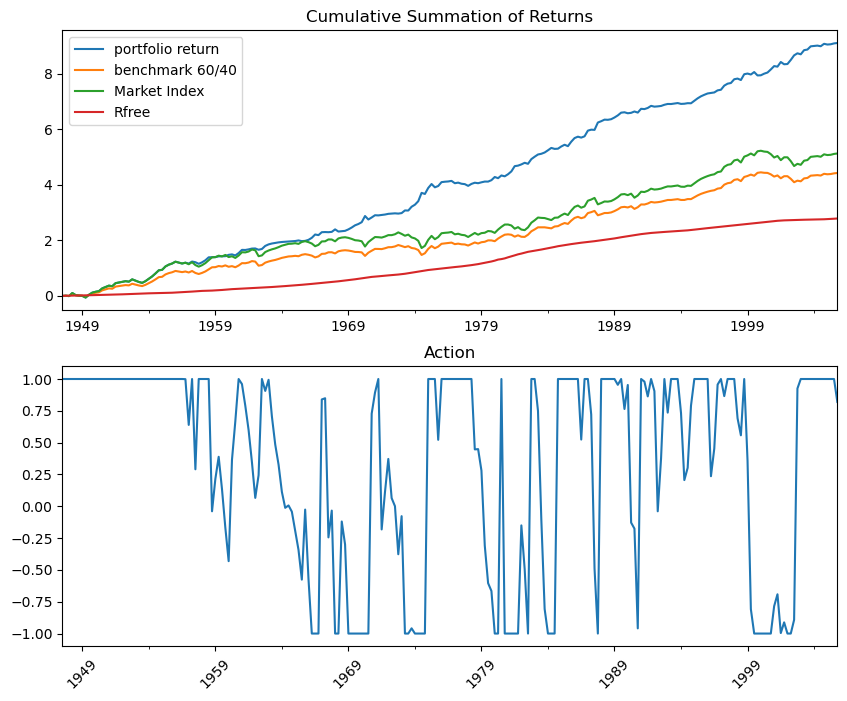

In [11]:
model = PPO.load('../../log/model/best_model', env=env)
performance = get_policy_in_sample_performance(env, model)
sharpe_ratio, fig, performance_df = evaluate_agent_action(performance)

In [12]:
fig.savefig('../../picture/RL_in_sample_performance_gamma_0.png')

## Action space
We have two options for action space. We can restrict the portfolio weight to be positive to prohibit short selling. The other option is allowing the short selling.

In [7]:
START_DATE = '1965'
END_DATE = '2005'
data, equities_returns, equities_returns_vol = get_env_data(START_DATE, END_DATE)
features_dict = {'volatility': equities_returns_vol}
env_data_dict = {'state': data, 
                 'portfolio': equities_returns, 
                 'features': features_dict}
eval_env = EconMarketEnv(env_data_dict, gamma = 3)
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path="../../log/model/",
                             log_path="../../log/trainning/", 
                             eval_freq=500,
                             deterministic=True, 
                             render=False,
                             verbose=0)
env = EconMarketEnv(env_data_dict, gamma = 3)
model = PPO("MlpPolicy", env, tensorboard_log="../../log/tensorboard_reward_utility/", verbose=0)
model.learn(int(2e5), progress_bar=True, callback=eval_callback)

Output()

Total reward: 4.847219239115357


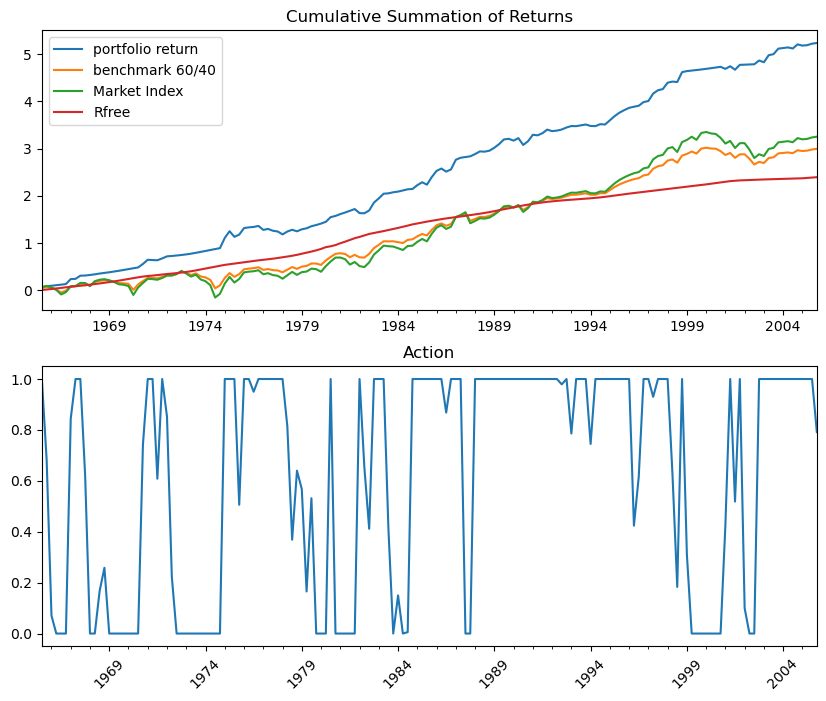

In [8]:
model = PPO.load('../../log/model/best_model', env=env)
performance = get_policy_in_sample_performance(env, model)
sharpe_ratio, fig, performance_df = evaluate_agent_action(performance)

In [9]:
fig.savefig('../../picture/RL_in_sample_performance_1965_2005.png')

## Time period
We consider three different periods, 1965-2005, 1976–2005, 2000-2005, which in line with Rapach (2010).

In [13]:
START_DATE = '2000'
END_DATE = '2005'
data, equities_returns, equities_returns_vol = get_env_data(START_DATE, END_DATE)
features_dict = {'volatility': equities_returns_vol}
env_data_dict = {'state': data, 
                 'portfolio': equities_returns, 
                 'features': features_dict}
eval_env = EconMarketEnv(env_data_dict, gamma = 3)
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path="../../log/model/",
                             log_path="../../log/trainning/", 
                             eval_freq=500,
                             deterministic=True, 
                             render=False,
                             verbose=0)
env = EconMarketEnv(env_data_dict, gamma = 3)
model = PPO("MlpPolicy", env, tensorboard_log="../../log/tensorboard_reward_utility/", verbose=0)
model.learn(int(2e5), progress_bar=True, callback=eval_callback)

Output()

Total reward: 0.6047740502912788


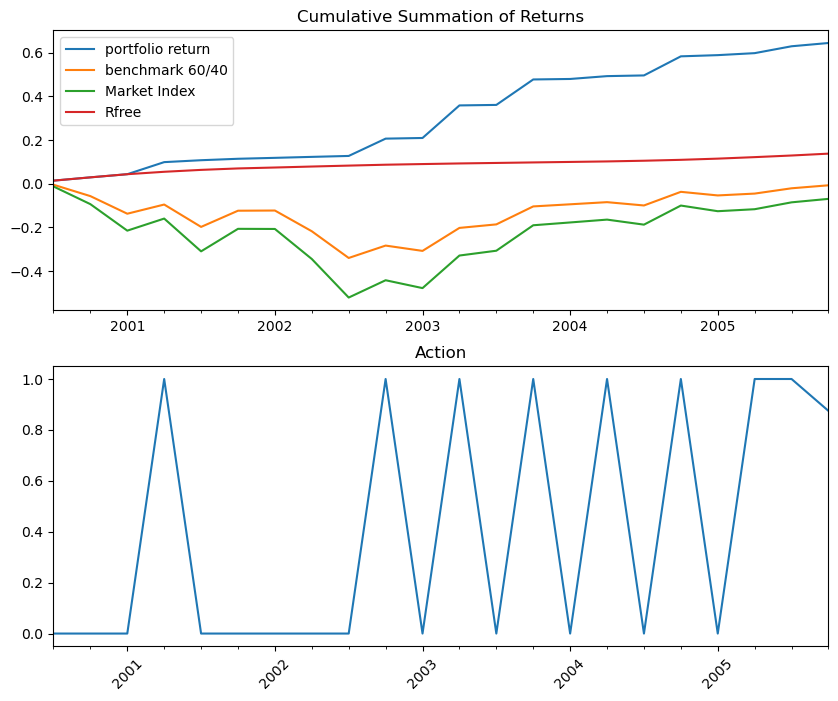

In [14]:
model = PPO.load('../../log/model/best_model', env=env)
performance = get_policy_in_sample_performance(env, model)
sharpe_ratio, fig, performance_df = evaluate_agent_action(performance)

In [15]:
fig.savefig('../../picture/RL_in_sample_performance_2000_2005.png')

## Discount factor
We consider three different discount factors, 0.99, 0.95 and 0.90. The discount rate determines the weight of future rewards. The higher the discount rate, the higher weights on the future. A typical range for discount rate is around 0.9 to 0.99.

In [26]:
START_DATE = '1965'
END_DATE = '2005'
data, equities_returns, equities_returns_vol = get_env_data(START_DATE, END_DATE)
features_dict = {'volatility': equities_returns_vol}
env_data_dict = {'state': data, 
                 'portfolio': equities_returns, 
                 'features': features_dict}
eval_env = EconMarketEnv(env_data_dict, gamma = 3)
eval_callback = EvalCallback(eval_env, 
                             best_model_save_path="../../log/model/",
                             log_path="../../log/trainning/", 
                             eval_freq=500,
                             deterministic=True, 
                             render=False,
                             verbose=0)
env = EconMarketEnv(env_data_dict, gamma = 3)
model = PPO("MlpPolicy", env, tensorboard_log="../../log/tensorboard_reward_utility/", verbose=0, gamma=0.9)
model.learn(int(2e5), progress_bar=True, callback=eval_callback)

Output()

Total reward: 4.836363929010263


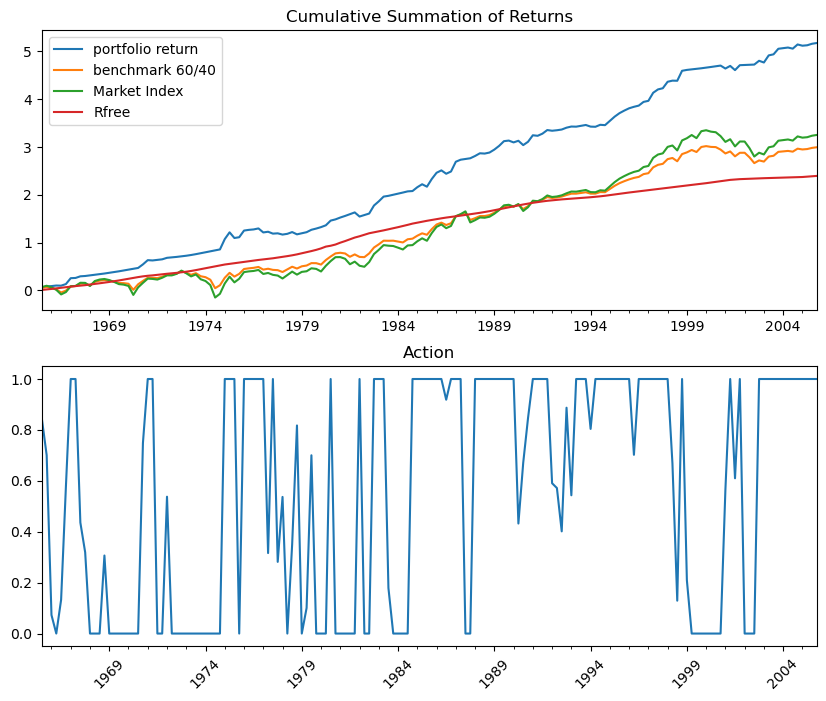

In [29]:
model = PPO.load('../../log/model/best_model', env=env)
performance = get_policy_in_sample_performance(env, model)
sharpe_ratio, fig, performance_df = evaluate_agent_action(performance)

In [25]:
fig.savefig('../../picture/RL_in_sample_performance_gamma_0.9.png')